In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data cleansing and merging steps

In [3]:
vax= pd.read_csv('2021VAERSVAX.csv', encoding="ISO-8859-1")
data= pd.read_csv('2021VAERSDATA.csv', encoding="ISO-8859-1")
sym= pd.read_csv('2021VAERSSYMPTOMS.csv', encoding="ISO-8859-1")

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (7,12,15,23) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
new=pd.DataFrame.merge(data, vax, on="VAERS_ID", how="left")
new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 792084 entries, 0 to 792083
Data columns (total 42 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VAERS_ID         792084 non-null  int64  
 1   RECVDATE         792084 non-null  object 
 2   STATE            689647 non-null  object 
 3   AGE_YRS          706990 non-null  float64
 4   CAGE_YR          634164 non-null  float64
 5   CAGE_MO          6691 non-null    float64
 6   SEX              792084 non-null  object 
 7   RPT_DATE         840 non-null     object 
 8   SYMPTOM_TEXT     791740 non-null  object 
 9   DIED             11899 non-null   object 
 10  DATEDIED         10581 non-null   object 
 11  L_THREAT         12594 non-null   object 
 12  ER_VISIT         139 non-null     object 
 13  HOSPITAL         56492 non-null   object 
 14  HOSPDAYS         36678 non-null   float64
 15  X_STAY           416 non-null     object 
 16  DISABLE          13831 non-null   obje

In [5]:
#filter the covid data, vaccine type=COVID19
covid_df= new[new['VAX_TYPE']=='COVID19']
covid_df.shape

(736833, 42)

In [6]:
#vaccine data =2020
covid_df["VAX_DATE"]= pd.to_datetime(covid_df['VAX_DATE'])
covid_df["ONSET_DATE"]= pd.to_datetime(covid_df['ONSET_DATE'])
final_df=covid_df[(covid_df["VAX_DATE"]>"2020-01-01")]

final_df.shape

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


(688314, 42)

In [7]:
#Join with symptom data
All=pd.DataFrame.merge(final_df, sym, on="VAERS_ID", how="left")


In [8]:
# drop the duplicate ID
All_new = All.drop_duplicates("VAERS_ID", inplace = False)
All_new.head()

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,DIED,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,NaN,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,NaN,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",NaN,...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",NaN,...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",NaN,...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [ ]:
#export into csv file and do partA and partB in SAS
All_new.to_csv('ALL.csv', index="FALSE")

Part 4 

In [2]:
ALLNEW= pd.read_csv('All.csv')
ALLNEW.head()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3524: DtypeWarning: Columns (8,13,16,24,32) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,CAGE_MO,SEX,RPT_DATE,SYMPTOM_TEXT,...,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,SYMPTOM5,SYMPTOMVERSION5
0,0,916600,01/01/2021,TX,33.0,33.0,NaN,F,NaN,Right side of epiglottis swelled up and hinder...,...,Dysphagia,23.1,Epiglottitis,23.1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,916601,01/01/2021,CA,73.0,73.0,NaN,F,NaN,Approximately 30 min post vaccination administ...,...,Anxiety,23.1,Dyspnoea,23.1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,916602,01/01/2021,WA,23.0,23.0,NaN,F,NaN,"About 15 minutes after receiving the vaccine, ...",...,Chest discomfort,23.1,Dysphagia,23.1,Pain in extremity,23.1,Visual impairment,23.1,NaN,NaN
3,3,916603,01/01/2021,WA,58.0,58.0,NaN,F,NaN,"extreme fatigue, dizziness,. could not lift my...",...,Dizziness,23.1,Fatigue,23.1,Mobility decreased,23.1,NaN,NaN,NaN,NaN
4,4,916604,01/01/2021,TX,47.0,47.0,NaN,F,NaN,"Injection site swelling, redness, warm to the ...",...,Injection site erythema,23.1,Injection site pruritus,23.1,Injection site swelling,23.1,Injection site warmth,23.1,NaN,NaN


In [3]:
ALLNEW.describe()

,Unnamed: 0,VAERS_ID,AGE_YRS,CAGE_YR,CAGE_MO,HOSPDAYS,NUMDAYS,FORM_VERS,SYMPTOMVERSION1,SYMPTOMVERSION2,SYMPTOMVERSION3,SYMPTOMVERSION4,SYMPTOMVERSION5
count,942029.000000,9.420290e+05,903460.00000,821884.000000,1154.000000,76993.000000,895500.000000,942029.000000,942029.000000,744950.000000,579199.000000,445892.000000,337354.000000
mean,471014.000000,1.407288e+06,49.93414,49.703566,0.078250,18.851116,17.640924,1.999281,23.968122,23.966894,23.965356,23.967181,23.967945
std,271940.492705,3.125652e+05,18.92067,19.080310,0.177004,1139.545276,49.388899,0.026798,0.224817,0.226123,0.228128,0.226631,0.228022
min,0.000000,9.166000e+05,0.08000,0.000000,0.000000,1.000000,0.000000,1.000000,23.100000,23.100000,23.100000,23.100000,23.100000
25%,235507.000000,1.137448e+06,35.00000,35.000000,0.000000,2.000000,0.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
50%,471014.000000,1.367939e+06,50.00000,50.000000,0.000000,4.000000,1.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
75%,706521.000000,1.674503e+06,65.00000,65.000000,0.100000,7.000000,7.000000,2.000000,24.000000,24.000000,24.000000,24.000000,24.000000
max,942028.000000,2.196117e+06,119.00000,120.000000,1.000000,99999.000000,685.000000,2.000000,25.000000,25.000000,25.000000,25.000000,25.000000


In [5]:
# make sure the obs are all COVID19
ALLNEW_VAX = ALLNEW[ALLNEW['VAX_TYPE'] == 'COVID19']
ALLNEW_VAX.info()
  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 942029 entries, 0 to 942028
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       942029 non-null  int64  
 1   VAERS_ID         942029 non-null  int64  
 2   RECVDATE         942029 non-null  object 
 3   STATE            857153 non-null  object 
 4   AGE_YRS          903460 non-null  float64
 5   CAGE_YR          821884 non-null  float64
 6   CAGE_MO          1154 non-null    float64
 7   SEX              942029 non-null  object 
 8   RPT_DATE         617 non-null     object 
 9   SYMPTOM_TEXT     941721 non-null  object 
 10  DIED             17891 non-null   object 
 11  DATEDIED         17307 non-null   object 
 12  L_THREAT         24935 non-null   object 
 13  ER_VISIT         129 non-null     object 
 14  HOSPITAL         105292 non-null  object 
 15  HOSPDAYS         76993 non-null   float64
 16  X_STAY           651 non-null     obje

Text(0.5, 0.98, 'Distribution Of Vaccines Amongst Manufacturers')

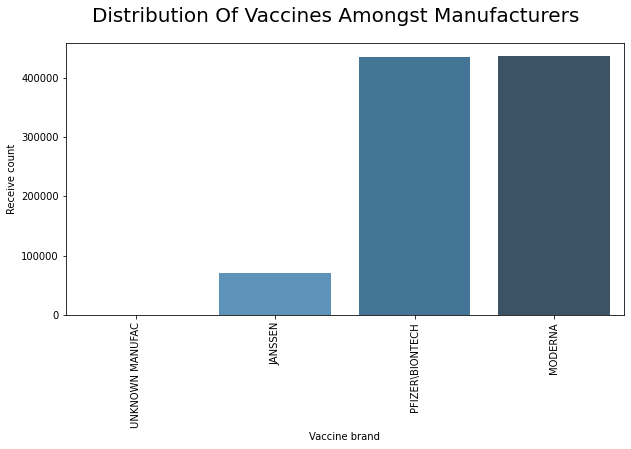

In [8]:
# plot Distribution Of Vaccines Amongst Manufacturers
VAX_count=ALLNEW_VAX.VAX_MANU.value_counts()

plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.barplot(x=VAX_count.index, y=VAX_count, order=["UNKNOWN MANUFAC", "JANSSEN", "PFIZER\BIONTECH", "MODERNA" ], palette="Blues_d")

plt.xlabel('Vaccine brand')
plt.ylabel('Receive count')
plt.suptitle('Distribution Of Vaccines Amongst Manufacturers', fontsize=20)

In [22]:
# make a table with Vax_count information amongst manufacturer
VAX_count=ALLNEW_VAX[['VAERS_ID','VAX_MANU']].groupby(['VAX_MANU']).size().reset_index(name='Vax_count')

print(VAX_count)

               VAX_MANU  Vax_count
0               JANSSEN      69755
1               MODERNA     436535
2       PFIZER\BIONTECH     433986
3  UNKNOWN MANUFACTURER       1753


In [13]:
# make a table with Die_count information amongst manufacturer
Die_perc = ALLNEW_VAX[ALLNEW_VAX['DIED'] == 'Y'].groupby(['VAX_MANU']).size().reset_index(name='Die_count') 
print(Die_perc)

               VAX_MANU  Die_count
0               JANSSEN       1498
1               MODERNA       7441
2       PFIZER\BIONTECH       8903
3  UNKNOWN MANUFACTURER         49


In [27]:
#merge two data set 
DeathRate=pd.DataFrame.merge(VAX_count, Die_perc, on="VAX_MANU", how="left")
DeathRate.head()

,VAX_MANU,Vax_count,Die_count
0,JANSSEN,69755,1498
1,MODERNA,436535,7441
2,PFIZER\BIONTECH,433986,8903
3,UNKNOWN MANUFACTURER,1753,49


In [28]:
#compute ther Death Rate of different brands
DeathRate['DeathRate(%)']= (DeathRate['Die_count']/DeathRate['Vax_count'] *100)
DeathRate.head()

,VAX_MANU,Vax_count,Die_count,DeathRate(%)
0,JANSSEN,69755,1498,2.147516
1,MODERNA,436535,7441,1.704560
2,PFIZER\BIONTECH,433986,8903,2.051449
3,UNKNOWN MANUFACTURER,1753,49,2.795208


Text(0.5, 0.98, 'Death rate of vaccine brand')

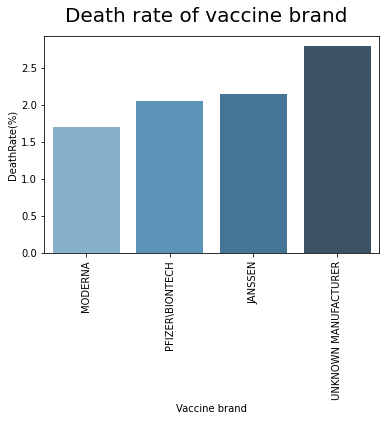

In [30]:
import numpy as np
sns.barplot(x='VAX_MANU', y='DeathRate(%)',
            data=DeathRate, estimator=np.mean, ci=95, order=[ "MODERNA", "PFIZER\BIONTECH", "JANSSEN", "UNKNOWN MANUFACTURER"], palette="Blues_d")
plt.xticks(rotation=90)

plt.xlabel('Vaccine brand')
plt.ylabel('DeathRate(%)')
plt.suptitle('Death rate of vaccine brand', fontsize=20)

In [31]:
#  table shows NUMDAYS of brands on different sex group
ALLNEW_VAX.groupby(['VAX_MANU','SEX'])['NUMDAYS'].mean()

VAX_MANU              SEX
JANSSEN               F      13.085891
                      M      19.732981
                      U      12.238806
MODERNA               F      13.818961
                      M      24.112512
                      U      10.595289
PFIZER\BIONTECH       F      16.320125
                      M      25.447461
                      U      14.064065
UNKNOWN MANUFACTURER  F      14.252592
                      M      24.483553
                      U      14.473684
Name: NUMDAYS, dtype: float64

Text(0.5, 0.98, 'NUMDAYS OF BRANDS ON DIFFERENT SEX GROUPS')

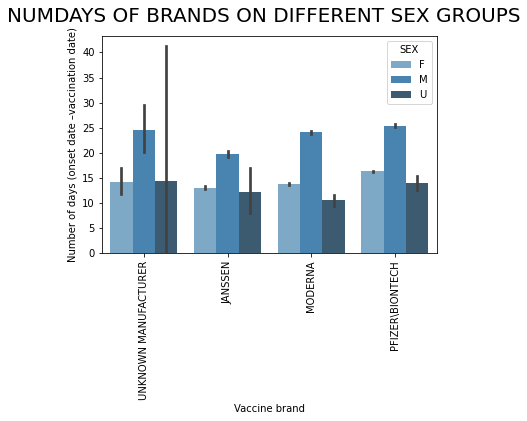

In [38]:
# plot shows NUMDAYS of brands on different sex group
import numpy as np
sns.barplot(x='VAX_MANU', y='NUMDAYS', hue='SEX',
            data=ALLNEW_VAX, estimator=np.mean, ci=95, order=[ "UNKNOWN MANUFACTURER", "JANSSEN", "MODERNA", "PFIZER\BIONTECH"  ],palette="Blues_d")
plt.xticks(rotation=90)

plt.xlabel('Vaccine brand')
plt.ylabel('Number of days (onset date –vaccination date)')
plt.suptitle('NUMDAYS OF BRANDS ON DIFFERENT SEX GROUPS', fontsize=20)